# K-Means Application : Image Segmentation

### Import the necessary libraries

In [116]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.image as mpimg
from sklearn.utils import shuffle
from sklearn.metrics import pairwise_distances_argmin
import matplotlib.pyplot as plt
import numpy as np

In [117]:
iris = datasets.load_iris()
x = iris.data
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [118]:
kmeans = KMeans(n_clusters = 3, random_state = 69)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [119]:
kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [120]:
x.shape

(150, 4)

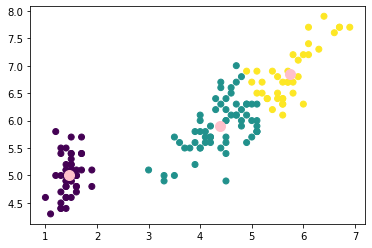

In [121]:
#Visualising the clusters
plt.scatter(x[:,2],x[:,0],c=y_kmeans)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,0], s = 100, c = 'pink', label = 'Centroids')

In [122]:
image = mpimg.imread('photo.jpg')
image = np.array(image, dtype=np.float64) / 255
w, h, d = original_shape = tuple(image.shape)

assert d == 3

image_array = np.reshape(image, (w * h, d))

image_array_sample = shuffle(image_array, random_state=0)[:1000]

kmeans = KMeans(n_clusters=10, random_state=0).fit(image_array_sample)

In [123]:
image_array_sample

array([[0.        , 0.        , 0.        ],
       [1.        , 0.9372549 , 0.49411765],
       [0.99215686, 0.95686275, 0.55294118],
       ...,
       [0.4745098 , 0.65882353, 0.35294118],
       [0.71372549, 0.58431373, 0.61960784],
       [0.        , 0.        , 0.00784314]])

In [124]:
labels = kmeans.predict(image_array)
len(labels)

119850

In [125]:
def recreate_image(codebook, labels, w, h,z):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            if labels[label_idx]==z:                
                image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

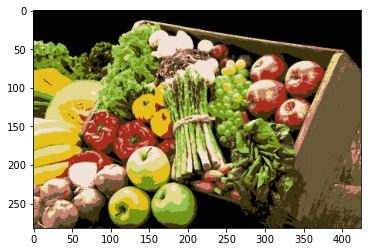

In [130]:
image = np.zeros((w, h, d))
for i in range(10):
    image += recreate_image(kmeans.cluster_centers_, labels, w, h,i)
    plt.imshow(image)


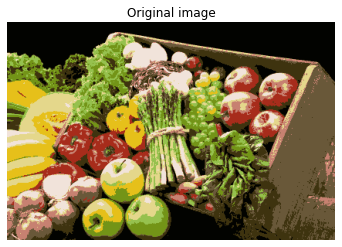

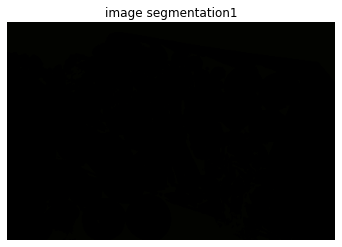

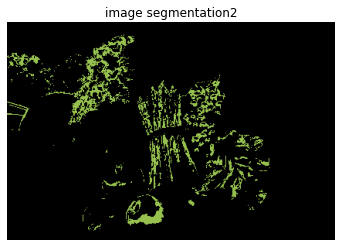

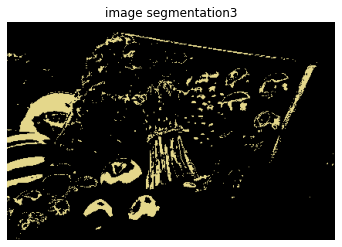

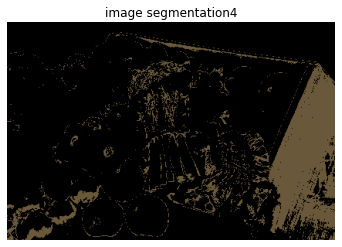

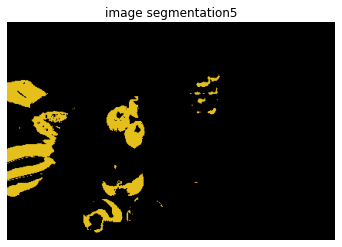

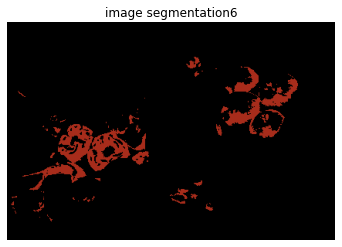

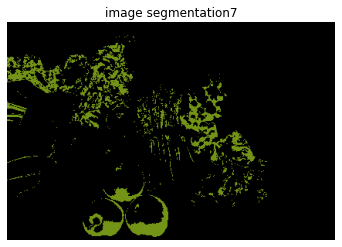

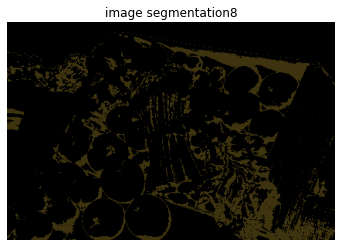

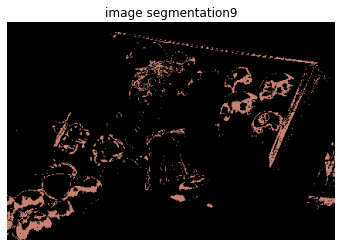

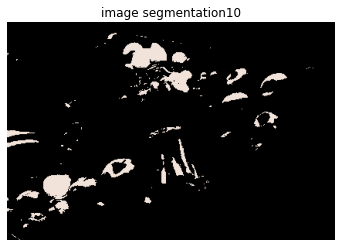

In [131]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(image)

for i in range(10):
    
    plt.figure(i+2)
    plt.clf()
    plt.axis('off')
    plt.title('image segmentation'+ str(i+1))
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h,i))